## load libraries Pythons in Jupyter

In [7]:
# !pip install kaleido
# !pip install --upgrade pyviz_comms
# !pip install git+https://github.com/holoviz/panel.git@v1.0.0rc2
# !pip install scikit-learn
# !pip install tqdm
# !pip install --upgrade pip 

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import glob
import os 
import kaleido
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
tqdm.pandas()

In [9]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [10]:
def environment():
    try:
        get_ipython()
        return "notebook"
    except:
        return "server"
environment()

'notebook'

## Load tables and other datas 

In [12]:
buildingTables = True
filtros = ['Gap-fill']
nameBacias = [
      '765', '7544', '7541', '7411', '746', '7591', '7592', 
    '761111', '761112', '7612', '7613', '7614', '7615', 
    '771', '7712', '772', '7721', '773', '7741', '7746', '7754', 
    '7761', '7764',   '7691', '7581', '7625', '7584', '751',     
    '7616', '745', '7424', '7618', '7561', '755', '7617', 
    '7564', '7422', '76116', '7671', '757', '766', '753', '764',
    '7619', '7443', '7438', '763', '7622', '752'
]

In [16]:
def getPathCSV (nfolder1, nfolder2):
    # get dir path of script 
    mpath = os.getcwd()
    # get dir folder before to path scripts 
    pathparent = str(Path(mpath).parents[1])
    print(pathparent)
    # folder of CSVs ROIs
    roisPathAcc = os.path.join(pathparent, 'dados', nfolder1, nfolder2)
    return pathparent, roisPathAcc
# help(os)
base_path, input_path_CSVs = getPathCSV('acc','ptosAccCol10')
print("path the base ", base_path)
print("path of CSVs from folder ", input_path_CSVs)

/home/superuser/Dados/mapbiomas/dev_collection_10/src
path the base  /home/superuser/Dados/mapbiomas/dev_collection_10/src
path of CSVs from folder  /home/superuser/Dados/mapbiomas/dev_collection_10/src/dados/acc/ptosAccCol10


In [17]:
def transformDataFrametoM(dftmp):
    lstYear = []
    lstRef = []
    lstClassif = []
    long = []
    lat = []
    pesos = []
    for yyear in range(1985, 2023):
        colRefe = 'CLASS_' + str(yyear)
        colClass = 'classification_' + str(yyear)
        lstRef += dftmp[colRefe].tolist()
        lstClassif += dftmp[colClass].tolist()
        lstYear += [yyear] * dftmp.shape[0]
        long += dftmp["LON"].tolist()
        lat += dftmp["LAT"].tolist()
        pesos += dftmp["PESO_AMOS"].tolist()
        
    dictDF = {
        'reference': lstRef,
        'classification': lstClassif,
        'years': lstYear,
        'LONG': long,
        'LAT': lat
    }
    dfref = pd.DataFrame.from_dict(dictDF)
    return dfref

In [31]:
filtro_sel = 'TemporalJ4'
bacia = '765'
nversion = '5'

if buildingTables:
    lst_paths = glob.glob(input_path_CSVs + '/*')
    lst_df = []
    for path in lst_paths[:]:        
        partes = path.split("/")[-1].split('_')
        filtro_type = partes[3]
        # bacia = partes[-3]
        version = partes[-1][1:2]
        # print(partes)
        print(f"tipo de filtro {filtro_type}, version {version}")
        namecol = path.split("/")[-1]
        if filtro_sel == filtro_type and str(nversion) == str(version):
            print("collection = ", namecol)
            df_CSV = pd.read_csv(path)
            # df_CSV = df_CSV.drop(['system:index', ".geo"], axis=1)
            print("size table = ", df_CSV.shape)
            print("Colunas ", df_CSV.columns)            
            print(df_CSV[['CLASS_1985', 'classification_1985' , 'bacia']].head())
            # df_transf = transformDataFrametoM(df_CSV)
            # df_transf['bacia'] = [namBacia] * df_transf.shape[0]
            # df_transf['models'] = [modelo] * df_transf.shape[0]
            # df_transf['version'] = [version] * df_transf.shape[0]
            # print(df_transf.shape)
            # print(df_transf.head())
            # lst_df.append(df_transf)

tipo de filtro TemporalJ5, version 5
tipo de filtro Spatial, version 5
tipo de filtro TemporalJ3, version 5
tipo de filtro Frequency, version 5
tipo de filtro TemporalAJ4, version 5
tipo de filtro Gap-fill, version 5
tipo de filtro TemporalAJ5, version 5
tipo de filtro TemporalAJ3, version 5
tipo de filtro TemporalJ4, version 5
collection =  occTab_corr_Caatinga_TemporalJ4_V5.csv
size table =  (10438, 81)
Colunas  Index(['Unnamed: 0', 'CLASS_1985', 'CLASS_1986', 'CLASS_1987', 'CLASS_1988',
       'CLASS_1989', 'CLASS_1990', 'CLASS_1991', 'CLASS_1992', 'CLASS_1993',
       'CLASS_1994', 'CLASS_1995', 'CLASS_1996', 'CLASS_1997', 'CLASS_1998',
       'CLASS_1999', 'CLASS_2000', 'CLASS_2001', 'CLASS_2002', 'CLASS_2003',
       'CLASS_2004', 'CLASS_2005', 'CLASS_2006', 'CLASS_2007', 'CLASS_2008',
       'CLASS_2009', 'CLASS_2010', 'CLASS_2011', 'CLASS_2012', 'CLASS_2013',
       'CLASS_2014', 'CLASS_2015', 'CLASS_2016', 'CLASS_2017', 'CLASS_2018',
       'CLASS_2019', 'CLASS_2020', 'CLASS_2

In [9]:
dfacc = pd.concat(lst_df, axis= 0)
print("size dataframe modifies ", dfacc.shape)
# folder output tables joined
nameTables = "registrosAccCol9.csv"
pathOutpout = base_path + '/dados/accTables/' + nameTables
dfacc.to_csv(pathOutpout)


size dataframe modifies  (271206, 8)


,reference,classification,years,LONG,LAT,bacia,models,version
0,10,22,1985,-43.995209,-15.808191,766,RF,5
1,4,4,1985,-43.743501,-15.529533,766,RF,5
2,15,4,1985,-43.564826,-15.178382,766,RF,5
3,4,4,1985,-43.534912,-15.721144,766,RF,5
4,4,4,1985,-43.790393,-15.388857,766,RF,5


In [27]:
dfacc.head()

,reference,classification,years,LONG,LAT,bacia,models,version
0,12,22,1985,-43.995209,-15.808191,766,RF,5
1,4,4,1985,-43.743501,-15.529533,766,RF,5
2,15,4,1985,-43.564826,-15.178382,766,RF,5
3,4,4,1985,-43.534912,-15.721144,766,RF,5
4,4,4,1985,-43.790393,-15.388857,766,RF,5


In [10]:
dictClass = {
    10: 12, 4: 4, 15: 15, 3: 3, 18: 18, 9: 10, 27: 27, 22: 22, 33: 33, 12: 12
}
# Remap column values in inplace
dfacc.replace({"reference": dictClass}, inplace=True) 

In [11]:
print("uniques values references ", dfacc["reference"].unique())
print("uniques values predictions ", dfacc["classification"].unique())

uniques values references  [12  4 15  3 18 10 27 22 33]
uniques values predictions  [22  4 15  3 12 18 33]


https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix </br>
https://pieriantraining.com/confusion-matrix-with-scikit-learn-and-python/


<table style="text-align:center">
    <tr>
        <th> </th>
        <th><h3>Predicted Positive</h3></th>
        <th><h3>Predicted Negative</h3> </th>
    </tr>
     <tr>
        <th>Actual Positive </th>
        <th>True Positive (TP) </th>
        <th>False Negative (FN) </th>
    </tr>
     <tr>
        <th>Actual Negative </th>
        <th>False Positive (FP) </th>
        <th>True Negative (TN) </th>
    </tr>
</table>


<h2 style="text-align:center"> Accuracy </h2>
$$
Accuracy = \frac{(Number\ of\ Correctly\ Classified\ Samples)}{(Total\ Number\ of\ Samples)}
$$
<h2 style="text-align:center"> Precision</h2>
$$
Precision =  \frac{(True\ Positives)}{(True\ Positives + False\ Positives)}
$$
<h2 style="text-align:center"> Recall</h2>
$$
Recall =  \frac{(True\ Positives)}{(True\ Positives + False\ Negatives)}
$$
<h2 style="text-align:center"> F1-Score</h2>
$$
F1-score =  \frac{2 * ((Precision * Recall)}{(Precision + Recall))}
$$

In [12]:
def calculing_metricsAcc (dfTmp, showMatConf):
    if showMatConf:
        conf_matrix = confusion_matrix(dfTmp['reference'], dfTmp['classification'], labels=[3,4,12,15,18,22,33])
        print(conf_matrix)   
    precision = precision_score(dfTmp['reference'], dfTmp['classification'], average='micro')
    reCall = recall_score(dfTmp['reference'], dfTmp['classification'], average='micro')
    f1Score = f1_score(dfTmp['reference'], dfTmp['classification'], average='micro')
    acc = accuracy_score(dfTmp['reference'], dfTmp['classification'])
    if showMatConf:
        print("Acuracia ", acc)
        print("precision ", precision)
        print("reCall ", reCall)
        print("f1 Score ", f1Score)
    return acc, precision, reCall, f1Score

In [13]:
lstmodels = []
lstAcc = []
lstBacias = []
lstVersion = []
lstprecis = []
lstrecall = []
lstf1Sc = []
if buildingTables:
    for vers in ['5']:
        for model in modelos:
            lstVersion += [vers] * len(nameBacias)
            lstmodels += [model] * len(nameBacias)
            lstBacias += nameBacias
            for nbacia in nameBacias:
                df_tmp = dfacc[(dfacc['version'] == vers) & (dfacc['models'] == model) & (dfacc['bacia'] == nbacia)]                    
                Acc, precis, recall, f1score = calculing_metricsAcc (df_tmp, False)
                lstAcc.append(Acc) 
                lstprecis.append(precis)
                lstrecall.append(recall)
                lstf1Sc.append(f1score)            
    print("finish!")

/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-e

finish!


/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-e

In [14]:
print("Adding metrics Acc in the dictionary")
dictAcc = {
    "Bacia" : lstBacias,
    "Models": lstmodels,
    "Accuracy": lstAcc,
    "Precision": lstprecis,
    "ReCall": lstrecall,
    "F1-Score": lstf1Sc,
    "version": lstVersion
}
dfAccuracy = pd.DataFrame.from_dict(dictAcc)
print("size data frame", dfAccuracy.shape)
print(dfAccuracy.head())

Adding metrics Acc in the dictionary
size data frame (78, 7)
  Bacia Models  Accuracy  Precision    ReCall  F1-Score version
0   741     RF  0.595076   0.595076  0.595076  0.595076       5
1  7421     RF  0.607769   0.607769  0.607769  0.607769       5
2  7422     RF  0.608485   0.608485  0.608485  0.608485       5
3   744     RF  0.666531   0.666531  0.666531  0.666531       5
4   745     RF  0.219015   0.219015  0.219015  0.219015       5


buildin dataframe accuracy by year

In [23]:
lstmodels = []
lstAcc = []
lstBacias = []
lstVersion = []
lstprecis = []
lstrecall = []
lstf1Sc = []
lstYear = []
lYear = [kk for kk in range(1985, 2023)]
for vers in ['5']:
    for model in modelos:
        lstVersion += [vers] * len(nameBacias) * len(lYear)
        lstmodels += [model] * len(nameBacias) * len(lYear)        
        for nbacia in nameBacias:
            lstBacias += [nbacia] * len(lYear)
            lstYear += lYear
                          
print("finish!")

finish!


In [24]:
print("Adding metrics Acc in the dictionary by Year")
dictAcc = {
    "Bacia" : lstBacias,
    "Models": lstmodels,
    "Years": lstYear,
    "version": lstVersion
}
dfAccuracyYY = pd.DataFrame.from_dict(dictAcc)
print("size data frame", dfAccuracyYY.shape)
print(dfAccuracyYY.head())

Adding metrics Acc in the dictionary by Year
size data frame (2964, 4)
  Bacia Models  Years version
0   741     RF   1985       5
1   741     RF   1986       5
2   741     RF   1987       5
3   741     RF   1988       5
4   741     RF   1989       5


In [ ]:
def calculing_metrics_Acc(row):  
    vers = row['version']
    model = row['Models']
    nbacia = row['Bacia']
    yyear = row['Years']
    df_tmp = dfacc[(dfacc['version'] == vers) & (dfacc['models'] == model) & (
                                            dfacc['bacia'] == nbacia) & ( dfacc['years'] == yyear)]                    
    Acc, precis, recall, f1score = calculing_metricsAcc (df_tmp, False)
    row["Accuracy"] = Acc
    row["Precision"] = precis
    row["ReCall"] = recall
    row["F1-Score"] = f1score
    return row

dfAccuracyYY = dfAccuracyYY.progress_apply(calculing_metrics_Acc, axis= 1)

 17%|████████████▋                                                               | 493/2964 [00:23<01:54, 21.62it/s]/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/superuser/py-env/pyJup/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to 

In [29]:
pathOutpout = base_path + '/dados/accTables/'
nameTablesGlob = "regMetricsAccGlobalCol9.csv"        
nameTablesYY = "regMetricsAccYearsCol9.csv"
nameTables = "registrosAccCol9.csv"
if buildingTables:
    dfAccuracy.to_csv(pathOutpout + nameTablesGlob)
    dfAccuracyYY.to_csv(pathOutpout + nameTablesYY)
    print("all saved!")
else:    
    dfacc = pd.read_csv(pathOutpout + nameTables)
    dfAccuracy = pd.read_csv(pathOutpout + nameTablesGlob)
    dfAccuracyYY = pd.read_csv(pathOutpout + nameTablesYY)
    # show the first rows     
    print("registros Agrupados \n", dfacc.head())
    print("Accuracia global \n", dfAccuracy)
    print("Acuracia por Ano \n", dfAccuracyYY)
    

all saved!


In [30]:
dfAccuracyYY.head()

,Bacia,Models,Years,version,Accuracy,Precision,ReCall,F1-Score
0,741,RF,1985,5,0.580645,0.580645,0.580645,0.580645
1,741,RF,1986,5,0.580645,0.580645,0.580645,0.580645
2,741,RF,1987,5,0.612903,0.612903,0.612903,0.612903
3,741,RF,1988,5,0.806452,0.806452,0.806452,0.806452
4,741,RF,1989,5,0.870968,0.870968,0.870968,0.870968


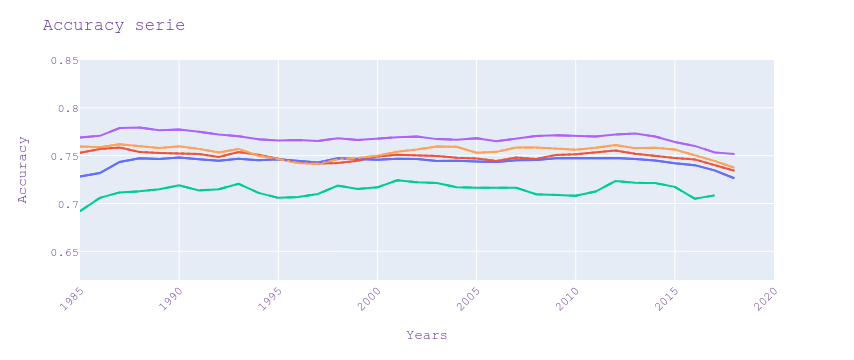

In [9]:
# Plotly figure 2
fig2 = go.Figure(fig.add_traces(
                 data=px.line(dfacc, x='Years', y='Accuracy',
                              color="Collections",
                              line_group="Collections", line_dash='Collections', hover_name="Collections")._data))
fig2.update_layout(title='Accuracy serie', showlegend=False)

#fig.show()
fig2.show()

In [10]:
nlabel = [str(kk) for kk in range(1985, 2019)]
# nlabel

NameError: name 'dfVer' is not defined

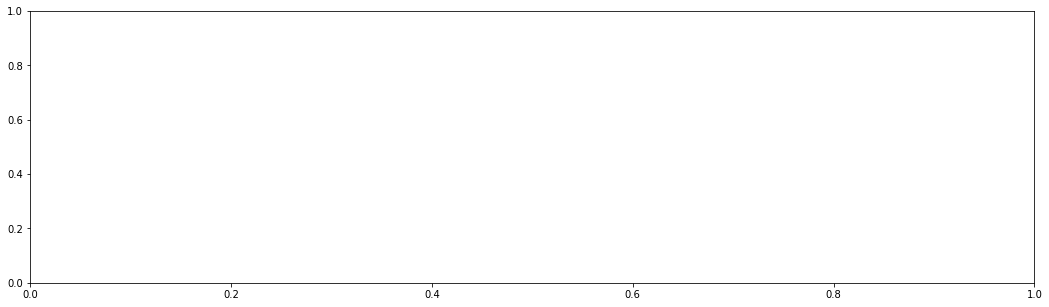

In [11]:
# ('acuracia','discordancia_Alocacao', 'discordancia_Area')
# plt.figure(figsize=(18, 5))
fig, ax = plt.subplots(figsize=(18, 5))

dado1 = ax.bar(dfVer['years'], dfVer[' global_accuracy'], 0.5, color='g')
dado2 = ax.bar(dfVer['years'], dfVer[' alloc_dis '], 0.5, color='y')
dado3 = ax.bar(dfVer['years'], dfVer['  quantity_diss '], 0.5, color='r')

ax.set_ylim([0, 100])
ax.set_xlim([1984, 2019])
# ax.set_xticklabels(nlabel, rotation=45)
# legend = ax.legend(loc=8, fontsize='x-large')
# Add annotation to bars 
# for i in ax.patches: 
#     print(i)
#     plt.text(i.get_width()+ 0.2, i.get_y()+0.5,  
#              str(round((i.get_width()), 2)), 
#              fontsize = 10, fontweight ='bold', 
#              color ='grey') 

fig.text(0.87, 0.8, 'accuracia máxima 73.06', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.85) 

# legend.get_frame().set_facecolor('C0')
plt.legend([dado1, dado2, dado3], ['Acurácia','Discordância alocação', 'Discordância área'], 
           loc=8, fontsize='x-large', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)
plt.title("Gráfico de Acurácia da Caatinga v7", fontsize='24')
plt.xlabel("Anos",fontsize='16')
plt.ylabel("Valores",fontsize='16')

In [12]:
path = 'OUTPUT/acc_occTabela_Caatinga_classesV7.csv'
df_occ = open(path, 'r')

FileNotFoundError: [Errno 2] No such file or directory: 'OUTPUT/acc_occTabela_Caatinga_classesV7.csv'

In [13]:
lsErros = []
texto= ''
for line in df_occ:
    if line.startswith("ANO:"):
        sline = line.split(":")
        texto += sline[1] + ','
    
    elif line.startswith("total"):
        sline = line.split(",")
        for ii in range(1,6):
            valor = float(sline[ii])*100
            valor = round(valor, 2)
            texto += str(valor) + ','
    elif line.startswith("producer's accuracy"):
        sline = line.split(",")
        for ii in range(1,6):
            valor = float(sline[ii])*100
            valor = round(valor, 2)
            texto += str(valor) + ','
        
    
    
    

NameError: name 'df_occ' is not defined

In [14]:
def ajusteGraficos(datos):
    maximo = np.max(datos)
    # maximo
    inicio = 2
    if len(datos) < 5:
        passo = 9
    else: 
        passo = 7

    lst_expl = []
    position = []
    for cc, dd in enumerate(datos):
        if cc == 0:
            position.append(inicio)
        else:
            position.append(position[-1] + passo)
        if dd < 0.25 * maximo:
            lst_expl.append(0.04)
        elif dd < 0.66 * maximo:
            lst_expl.append(0.02)
        else:
            lst_expl.append(0.01)
    
    return lst_expl

In [15]:
color_dict = {
    'florest formation': "006400", 
    'savanna formation': '00ff00', 
    'grassland': 'B8AF4F', 
    'pasture': 'FFD966', 
    'agriculture': 'E974ED',
    'non vegetated area': 'EA9999', 
    'Rocky Outcrop': '665a3a', 
    'water' : '0000FF'
}

In [16]:
listLabel = ['florest formation', 'savanna formation', 'grassland', 'pasture', 
               'agriculture','non vegetated area', 'Rocky Outcrop', 'water']
datos = [1003,1018,718,996,650,75,16,1116]
colores = []
dictm = {
    'cover' : listLabel,
    'class': [3, 4, 12, 15, 18, 22, 29, 33],
    'size':  datos
}
dataF = pd.DataFrame.from_dict(dictm)
dataF.head()

,cover,class,size
0,florest formation,3,1003
1,savanna formation,4,1018
2,grassland,12,718
3,pasture,15,996
4,agriculture,18,650


In [ ]:
lstexpl = ajusteGraficos(datos)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=listLabel, values=datos, 
                             textinfo='percent+value',  
                             insidetextorientation='radial',                             
                             pull = lstexpl                             
                            )])
fig.update_layout(width=600, height=700, uniformtext_minsize=65)
fig.show()

In [ ]:
fig = px.pie(dataF, names=listLabel, values=datos,                              
#                              insidetextorientation='radial',
                             color_discrete_map= color_dict,
#                              pull = lstexpl                             
                            )
fig.update_layout(width=600, height=700, uniformtext_minsize=65)
fig.show()